In [92]:
import json
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy

In [93]:
all_data = pd.read_csv('all_cornell.csv')
all_data

,username,id,title,artist,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6cjzkudbvmwfe963clvemzwkj,3N0gL4EypJfzJ6txDnIrDS,I Know Where The Rainbow has Fallen,JANNABI,False,43,0.456,0.660,-5.480,0.0280,0.4440,0.000094,0.1120,0.246,144.014
1,6cjzkudbvmwfe963clvemzwkj,2d87kHwM5YByBhsU8qCDWg,land of night,JANNABI,False,32,0.347,0.482,-8.947,0.0306,0.8420,0.048400,0.2110,0.109,147.900
2,6cjzkudbvmwfe963clvemzwkj,2XdyebP7KxClMOse2C5iyA,Your Dog Loves You,"Colde, Crush",False,2,0.667,0.233,-11.862,0.0302,0.9280,0.000027,0.1540,0.131,101.865
3,6cjzkudbvmwfe963clvemzwkj,2BkpDA0AyGPHzyae6wWtZW,Sigh (Feat. GIRIBOY),"BIG Naughty, GIRIBOY",False,40,0.697,0.437,-7.731,0.0491,0.6740,0.000000,0.0778,0.326,119.724
4,6cjzkudbvmwfe963clvemzwkj,0BFtp5qYodX3PCaSwYPa0G,NAPPA 나빠,Crush,False,0,0.561,0.542,-7.947,0.2580,0.3940,0.000000,0.1730,0.536,161.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48637,kaybae.,7Lbxvt42JsNSKVCaN63qhD,Wonderful Christmastime [Edited Version] - Rem...,Paul McCartney,False,26,0.774,0.511,-8.914,0.0319,0.3220,0.000000,0.0672,0.771,94.736
48638,kaybae.,6tjituizSxwSmBB5vtgHZE,Holly Jolly Christmas,Michael Bublé,False,47,0.647,0.465,-8.308,0.0428,0.8650,0.000000,0.0882,0.699,151.251
48639,kaybae.,3hK0tQgnfjXwaCd0oHV0u2,K For Christmas,Lil Mosey,True,38,0.707,0.530,-9.471,0.0789,0.2340,0.004400,0.1120,0.471,189.008
48640,kaybae.,1ADjWm8QNhgNV8yCNNgQ1T,Santa Tell Me,Ariana Grande,False,0,0.464,0.630,-7.337,0.1820,0.0464,0.000000,0.2950,0.527,132.960


In [94]:
def filter_top(pair, count):
    key, value = pair
    return value > count


top_songs = dict((all_data['title'] + ' - ' + all_data['artist']).value_counts())

top_songs = dict((filter(lambda x: filter_top(x, 15), top_songs.items())))

top_songs

{'Mr. Brightside - The Killers': 24,
 'Starships - Nicki Minaj': 21,
 'Heat Waves - Glass Animals': 19,
 'SLOW DANCING IN THE DARK - Joji': 19,
 'Are You Bored Yet? (feat. Clairo) - Wallows, Clairo': 19,
 'Sunflower - Spider-Man: Into the Spider-Verse - Post Malone, Swae Lee': 18,
 'Last Friday Night (T.G.I.F.) - Katy Perry': 18,
 'Circles - Post Malone': 18,
 'Everybody Talks - Neon Trees': 18,
 'California Gurls - Katy Perry, Snoop Dogg': 17,
 'Everybody Wants To Rule The World - Tears For Fears': 17,
 'Sweater Weather - The Neighbourhood': 17,
 'Can I Call You Tonight? - Dayglow': 17,
 'Viva La Vida - Coldplay': 17,
 'September - Earth, Wind & Fire': 17,
 'Super Bass - Nicki Minaj': 17,
 'Kiss Me More (feat. SZA) - Doja Cat, SZA': 16,
 'Party In The U.S.A. - Miley Cyrus': 16,
 'good 4 u - Olivia Rodrigo': 16,
 'drivers license - Olivia Rodrigo': 16,
 'Dark Red - Steve Lacy': 16,
 'TiK ToK - Kesha': 16}

In [95]:
top_artists = dict(all_data['artist'].value_counts())

top_artists = dict((filter(lambda x: filter_top(x, 150), top_artists.items())))
top_artists

{'BTS': 607,
 'Taylor Swift': 386,
 'Shin Giwon Piano': 202,
 'Lil Uzi Vert': 199,
 'Billie Eilish': 184,
 'Drake': 177,
 'The Weeknd': 176,
 'Kanye West': 165,
 'Fall Out Boy': 160,
 'One Direction': 158}

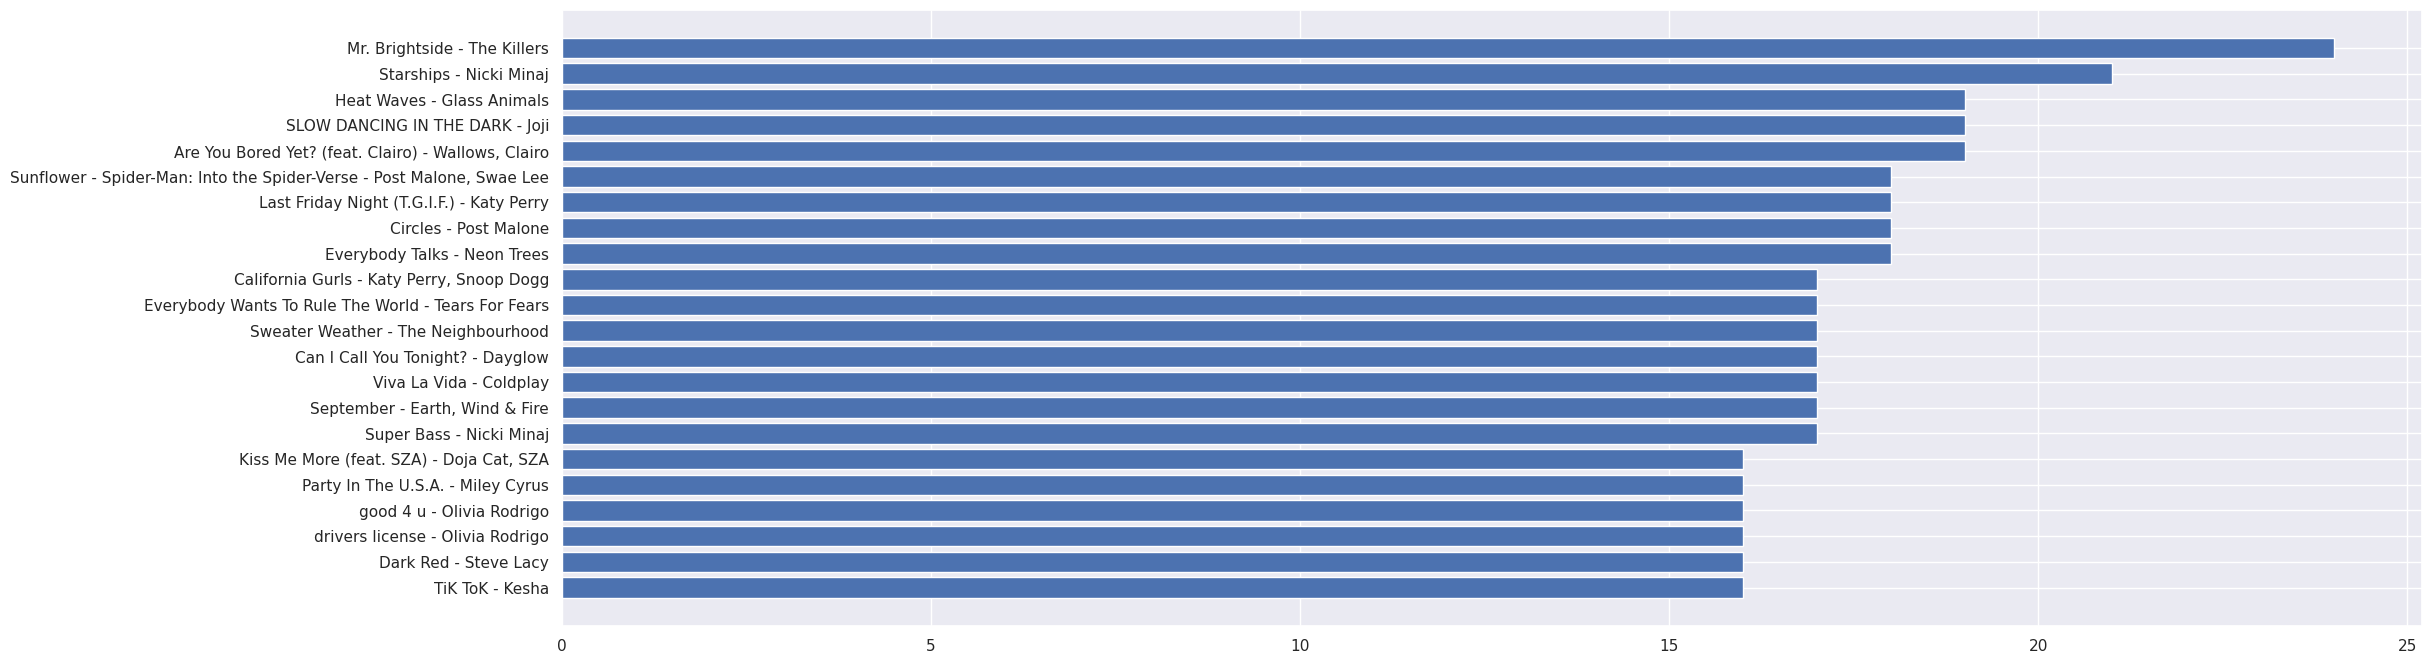

In [96]:
names = list(top_songs.keys())
values = list(top_songs.values())

plt.barh(range(len(top_songs)), values, tick_label=names)
plt.gca().invert_yaxis()
plt.show()

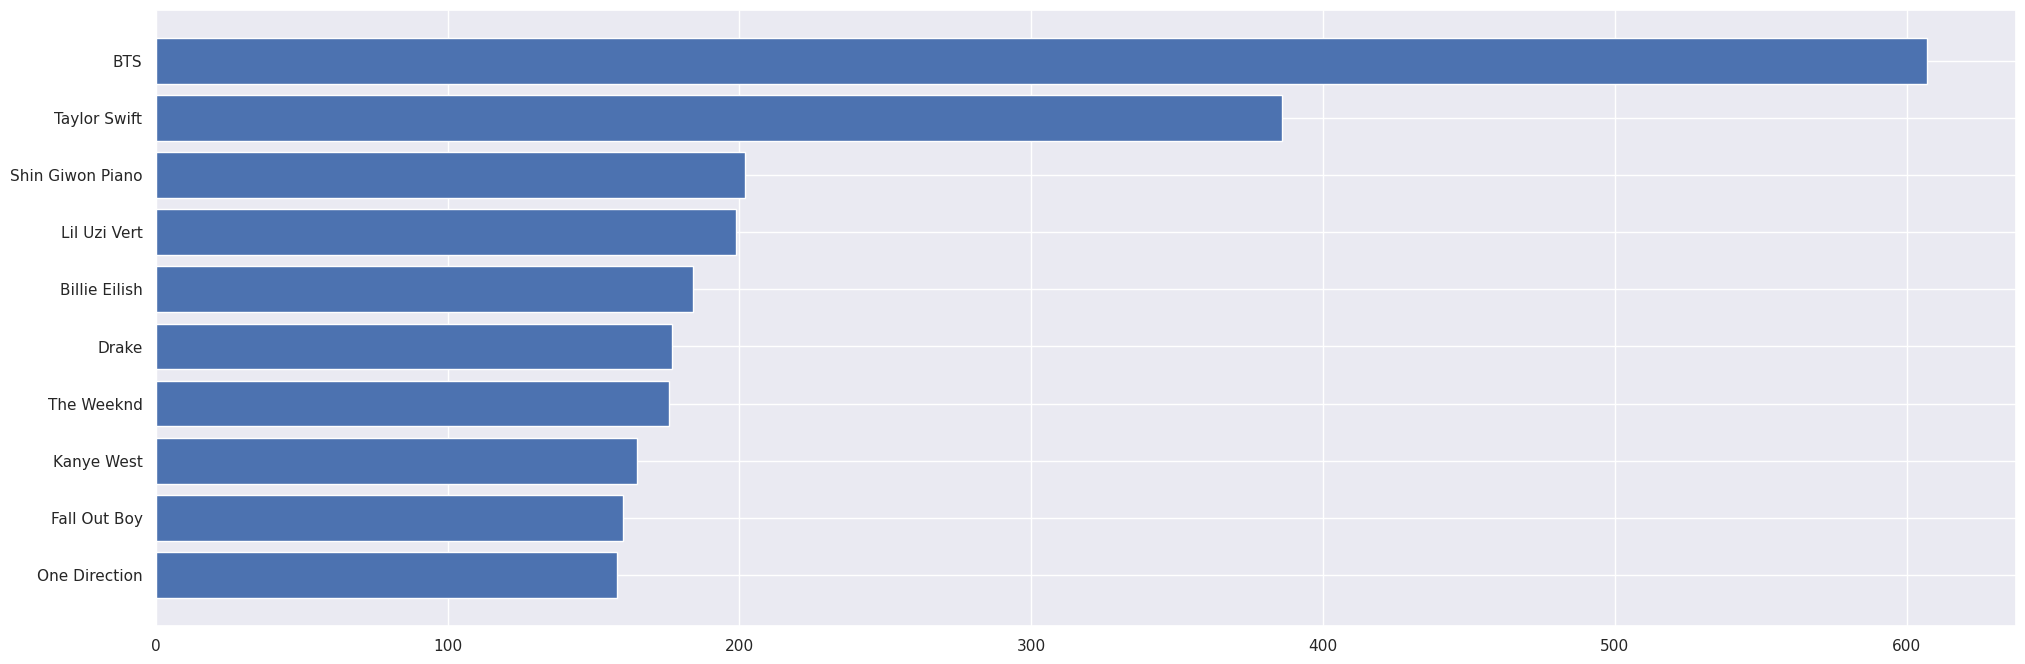

In [97]:
names = list(top_artists.keys())
values = list(top_artists.values())

plt.barh(range(len(top_artists)), values, tick_label=names)
plt.gca().invert_yaxis()
plt.show()

In [98]:
gym_data = pd.read_csv('all_cornell_gym.csv')
study_data = pd.read_csv('all_cornell_study.csv')
party_data = pd.read_csv('all_cornell_party.csv')
l_all = all_data.copy()
l_gym = gym_data.copy()
l_study = study_data.copy()
l_party = party_data.copy()
l_all['type'] = 'General'
l_gym['type'] = 'Gym'
l_study['type'] = 'Study'
l_party['type'] = 'Party'

concat_labels = pd.concat([l_all, l_gym, l_study, l_party])
concat_labels = concat_labels.reset_index(drop=True)

In [99]:
sns.set(rc = {'figure.figsize':(24,8)})
features = ['popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

for f in features:
   plt.title(f.capitalize() + ' vs. Type of Playlist')
   sns.kdeplot(
      data=concat_labels[[f, 'type']], x=f, hue='type',
      fill=True, common_norm=False, palette="viridis",
      alpha=.5, linewidth=0,
   )
   plt.show()
   